## K-nearest neighbours classification model
 - Pick a value for k
 - Search for the K observations in the training data that are "nearest" to the measurement of the unknown iris.
 - Use the most popular response value from the k nearest neighbours as the predicted response value for the unknown iris.

In [12]:
#import load_iris function from datasets module
from sklearn.datasets import load_iris
iris= load_iris()
X=iris.data
y=iris.target

In [13]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


 # Scikit-learn 4-step modeling pattern
 ## 1. Import the class you plan to use

In [14]:
from sklearn.neighbors import KNeighborsClassifier

## 2. "Instantiate" the "estimator"
- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [15]:
knn= KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter.
- Can specify tuning parameters (aka "hyperparameters") during this step.
- All parameters not specified are set to their defaults.

In [16]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


## 3. Fit the model with data ("model training")
- Model is learning the relationship between X and y
- Occurs in-place

In [17]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## 4. Predict the response for a new observation
- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [18]:
knn.predict([[3, 5, 4, 2]])

array([2])

- Returns a NumPy array
- Can predict for multiple observations at once

In [19]:
X_new=[[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

array([2, 1])

# Using a different value for k

In [20]:
#instantiating the model using k=5
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn.predict(X_new)

array([1, 1])

# Using different classificaton model

In [30]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(max_iter=9000)
lreg.fit(X,y)
lreg.predict([[6, 5, 4, 4]])


array([2])

# How to evaluate models

## Procedure 1: Train and Test on dataset
- Train the model on entire dataset
- Test the model on same dataset and evaluate how well we did by comparing the predicted response vaues with the true response values

In [31]:
lreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
y_prediction = lreg.predict(X)
len(y_prediction)

150

## Classification accuracy:
- Proportion of correct predictions
- Common evaluation metric for classification problems

In [36]:
from sklearn import metrics
print (metrics.accuracy_score(y, y_prediction))

0.9733333333333334


## KNN(k=5)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred= knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


## k=1

In [37]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred= knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


## Problems with training and testing on the same data
- Goal is to estimate likely performance model on out-of-sample data
- But, maximizing training accuracy rewards overly complex models that wont necessarily generalize
- Unnecessary complex models overfits the training data

# Evaluation process 2: Train/test split
- Split the dataset into two pieces: a training set and a testing set
- Train the model on the training set
- Test the model on the training set and evaluate how well we did

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [42]:
lreg.fit(X_train, y_train)
y_pred= lreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


# k=1

In [43]:
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [45]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [47]:
k_range= range(1,26)
score=[]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing accuracy')

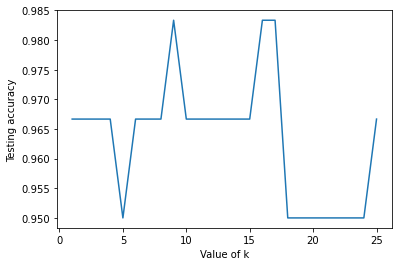

In [48]:
import matplotlib.pyplot as plt
# Allows plots to appear within the notebook
%matplotlib inline

# Plot the relation between k and score
plt.plot(k_range, score)
plt.xlabel("Value of k")
plt.ylabel("Testing accuracy")
